## Machine Learning Models Cars Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir('Downloads')


In [ ]:
cars_df=pd.read_csv('Cars.csv')

In [ ]:
cars_df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [ ]:
cars_df['Gender'].replace('Male', '1', inplace=True)
cars_df['Gender'].replace('Female', '0', inplace=True)

In [ ]:
cars_df.Transport.value_counts()

Public Transport     300
Private Transport    144
Name: Transport, dtype: int64

In [ ]:
cars_df['Transport'].replace('Public Transport', '1', inplace=True)
cars_df['Transport'].replace('Private Transport', '0', inplace=True)

In [ ]:
cars_df.describe()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,27.747748,0.754505,0.252252,6.299550,16.238739,11.323198,0.234234
std,4.416710,0.430866,0.434795,5.112098,10.453851,3.606149,0.423997
min,18.000000,0.000000,0.000000,0.000000,6.500000,3.200000,0.000000
25%,25.000000,1.000000,0.000000,3.000000,9.800000,8.800000,0.000000
50%,27.000000,1.000000,0.000000,5.000000,13.600000,11.000000,0.000000
75%,30.000000,1.000000,1.000000,8.000000,15.725000,13.425000,0.000000
max,43.000000,1.000000,1.000000,24.000000,57.000000,23.400000,1.000000


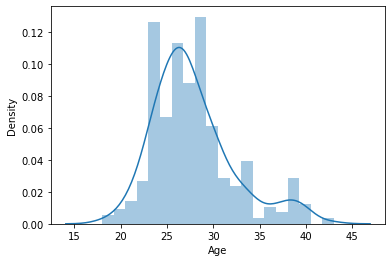

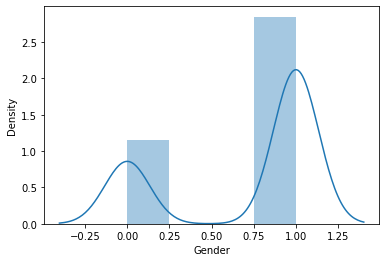

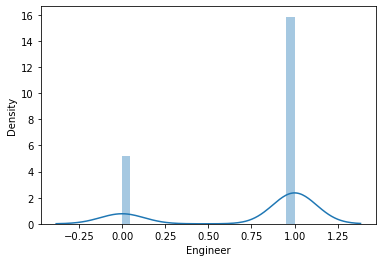

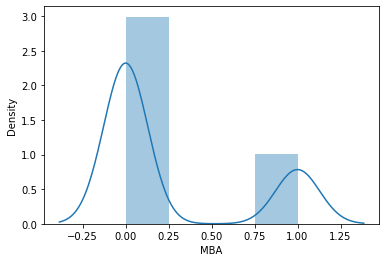

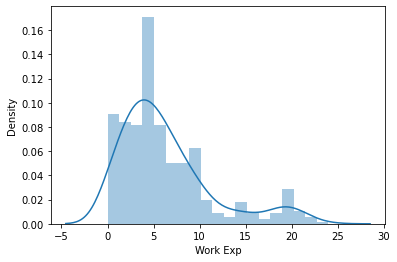

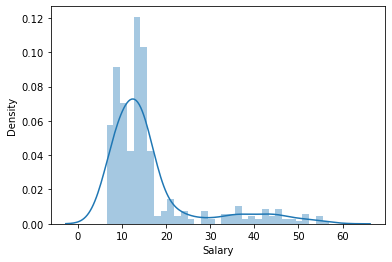

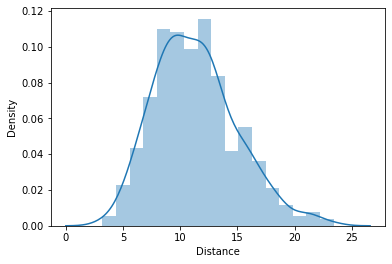

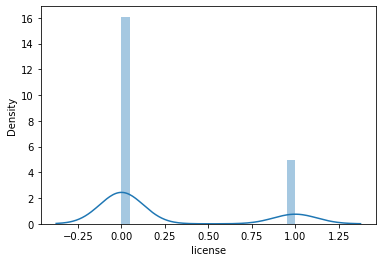

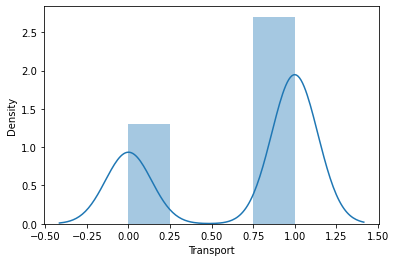

In [ ]:
for col in cars_df.columns:
    sns.distplot(cars_df[col].dropna())
    plt.show()

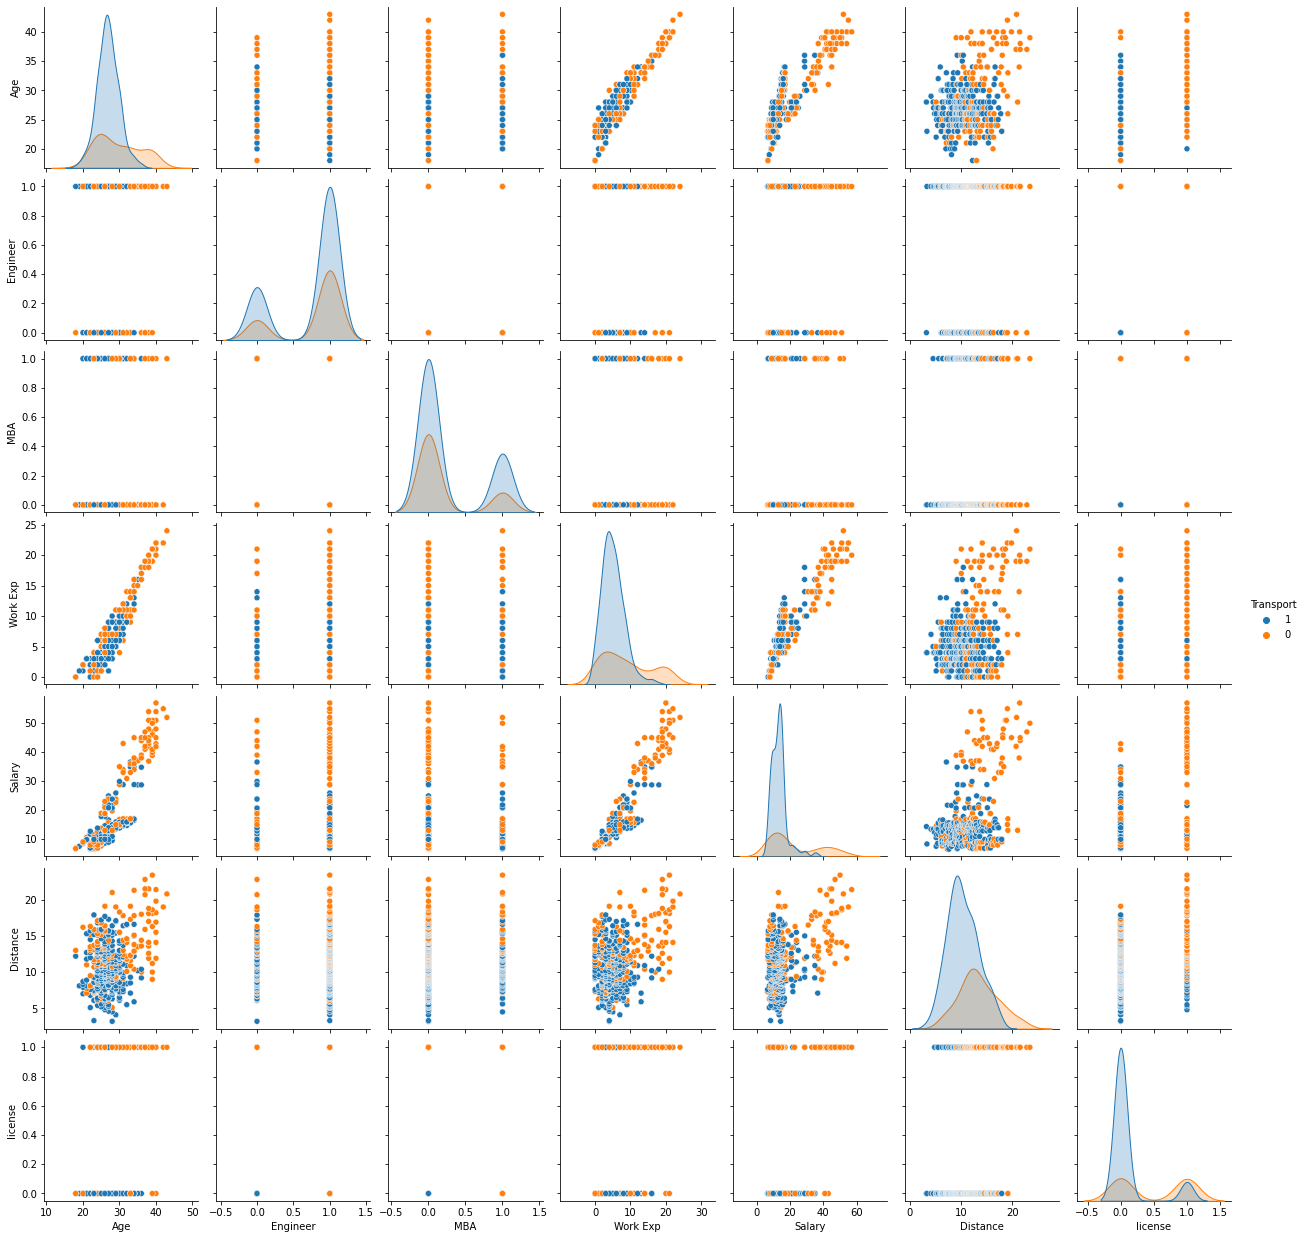

In [ ]:
sns.pairplot(cars_df, hue='Transport')
plt.show()

In [ ]:
corr=cars_df.corr()
corr


,Age,Engineer,MBA,Work Exp,Salary,Distance,license
Age,1.000000,0.091935,-0.029090,0.932236,0.860673,0.352872,0.452311
Engineer,0.091935,1.000000,0.066218,0.085729,0.086762,0.059316,0.018924
MBA,-0.029090,0.066218,1.000000,0.008582,-0.007270,0.036427,-0.027358
Work Exp,0.932236,0.085729,0.008582,1.000000,0.931974,0.372735,0.452867
Salary,0.860673,0.086762,-0.007270,0.931974,1.000000,0.442359,0.508095
Distance,0.352872,0.059316,0.036427,0.372735,0.442359,1.000000,0.290084
license,0.452311,0.018924,-0.027358,0.452867,0.508095,0.290084,1.000000


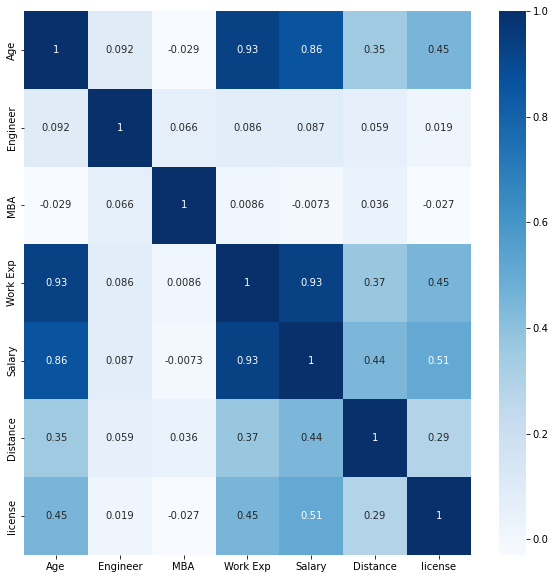

In [ ]:

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True,cmap='Blues')
plt.show()

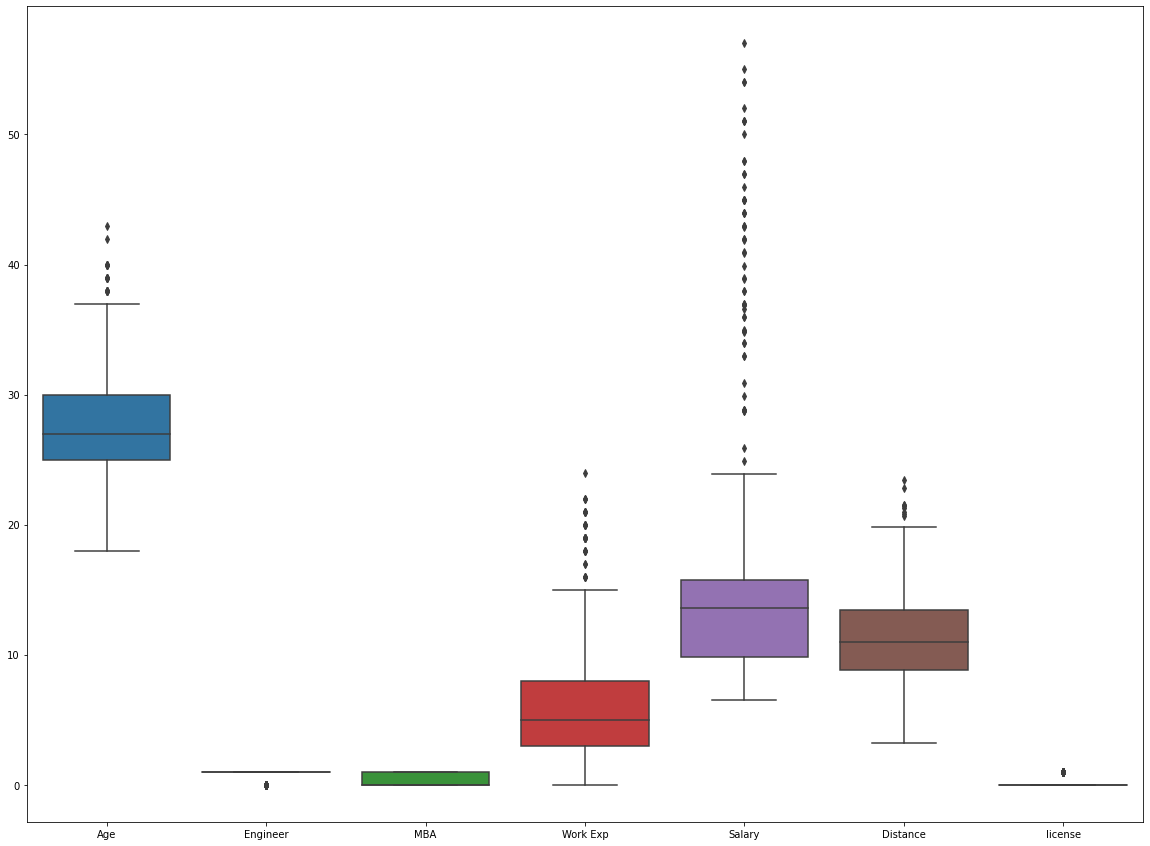

In [ ]:
plt.figure(figsize=(20,15))
sns.boxplot(data=cars_df)
plt.show()

In [ ]:
for col in cars_df.columns:
    cars_df[col] = pd.to_numeric(cars_df[col], errors='coerce')
    q1 = cars_df[col].quantile(0.25)
    q3 = cars_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    cars_df[col] = cars_df[col].apply(lambda x: upper_bound if x > upper_bound else x)
    cars_df[col] = cars_df[col].apply(lambda x: lower_bound if x < lower_bound else x)

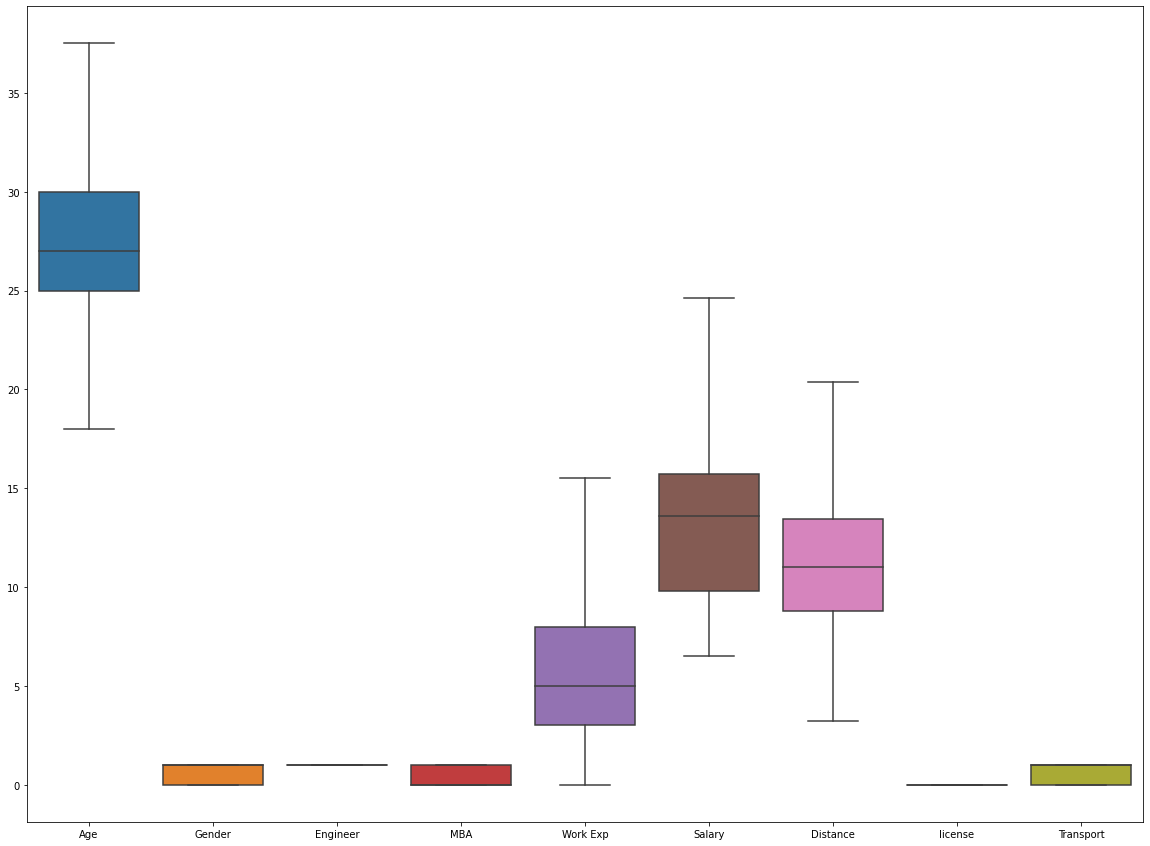

In [ ]:
plt.figure(figsize=(20,15))
sns.boxplot(data=cars_df)
plt.show()

In [ ]:
cars_df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28.0,1,1.0,0,4.0,14.3,3.2,0.0,1
1,23.0,0,1.0,0,4.0,8.3,3.3,0.0,1
2,29.0,1,1.0,0,7.0,13.4,4.1,0.0,1
3,28.0,0,1.0,1,5.0,13.4,4.5,0.0,1
4,27.0,1,1.0,0,4.0,13.4,4.6,0.0,1


In [ ]:
cars_df.describe()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
count,444.000000,444.000000,444.0,444.000000,444.000000,444.000000,444.000000,444.0,444.000000
mean,27.652027,0.711712,1.0,0.252252,5.981982,14.140175,11.298114,0.0,0.675676
std,4.168161,0.453477,0.0,0.434795,4.322328,5.322725,3.535968,0.0,0.468650
min,18.000000,0.000000,1.0,0.000000,0.000000,6.500000,3.200000,0.0,0.000000
25%,25.000000,0.000000,1.0,0.000000,3.000000,9.800000,8.800000,0.0,0.000000
50%,27.000000,1.000000,1.0,0.000000,5.000000,13.600000,11.000000,0.0,1.000000
75%,30.000000,1.000000,1.0,1.000000,8.000000,15.725000,13.425000,0.0,1.000000
max,37.500000,1.000000,1.0,1.000000,15.500000,24.612500,20.362500,0.0,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score

In [ ]:
X = cars_df.drop("Transport", axis=1)
y = cars_df["Transport"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression Model
Confusion Matrix:
[[24 24]
 [ 9 77]]
AUC: 0.6976744186046512
Accuracy (Logistic Regression): 0.753731343283582


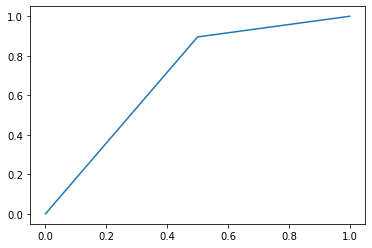

In [ ]:
# fit and evaluate logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Logistic Regression Model")
print("Confusion Matrix:")
print(conf_matrix)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC:", roc_auc)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
accuracy_logreg = accuracy_score(y_test, y_pred)
print("Accuracy (Logistic Regression):", accuracy_logreg)


Linear Discriminant Analysis Model
Confusion Matrix:
[[24 24]
 [ 9 77]]
AUC: 0.6976744186046512
Accuracy (Linear Discriminant Analysis): 0.753731343283582


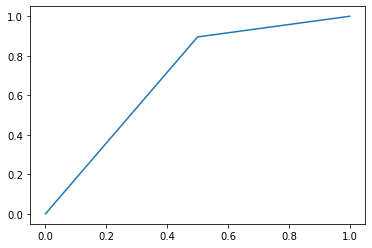

In [ ]:
# fit and evaluate linear discriminant analysis model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nLinear Discriminant Analysis Model")
print("Confusion Matrix:")
print(conf_matrix)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC:", roc_auc)
plt.plot(fpr, tpr, label='Linear Discriminant Analysis (area = %0.2f)' % roc_auc)
accuracy_lda = accuracy_score(y_test, y_pred)
print("Accuracy (Linear Discriminant Analysis):", accuracy_lda)


Decision Tree Model
Confusion Matrix:
[[36 12]
 [28 58]]
AUC: 0.7122093023255814
Accuracy (Decision Tree Classifier): 0.7014925373134329


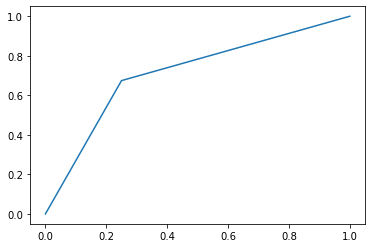

In [ ]:
# fit and evaluate decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nDecision Tree Model")
print("Confusion Matrix:")
print(conf_matrix)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC:", roc_auc)
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % roc_auc)
accuracy_dtc = accuracy_score(y_test, y_pred)
print("Accuracy (Decision Tree Classifier):", accuracy_dtc)


Naive Bayes Model
Confusion Matrix:
[[27 21]
 [ 9 77]]
AUC: 0.7289244186046512
Accuracy (Naive Bayes): 0.7761194029850746


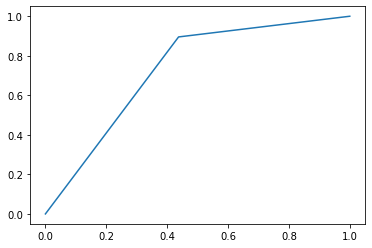

In [ ]:
# fit and evaluate Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nNaive Bayes Model")
print("Confusion Matrix:")
print(conf_matrix)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC:", roc_auc)
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % roc_auc)
accuracy_nb = accuracy_score(y_test, y_pred)
print("Accuracy (Naive Bayes):", accuracy_nb)


KNN Model
Confusion Matrix:
[[31 17]
 [ 6 80]]
AUC: 0.7880329457364341
Accuracy (KNN): 0.8283582089552238


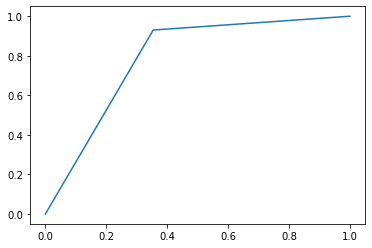

In [ ]:
# fit and evaluate KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nKNN Model")
print("Confusion Matrix:")
print(conf_matrix)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC:", roc_auc)
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % roc_auc)
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy (KNN):", accuracy_knn)


Gradient Boosting Model
Confusion Matrix:
[[31 17]
 [14 72]]
AUC: 0.7415213178294574
Accuracy (Gradient Boosting): 0.7686567164179104


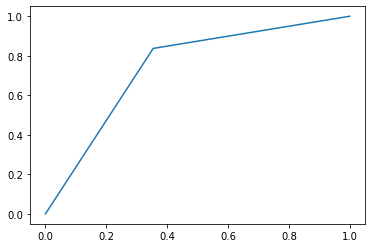

In [ ]:
# fit and evaluate gradient boosting model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nGradient Boosting Model")
print("Confusion Matrix:")
print(conf_matrix)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC:", roc_auc)
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % roc_auc)
accuracy_gb = accuracy_score(y_test, y_pred)
print("Accuracy (Gradient Boosting):", accuracy_gb)